In [ ]:

%run world.py


In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:

pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

# Generiere einen zufälligen Seed
seed = random.randint(0, 1000000)
#seed = 111857
#seed=193080
# Beispiel für die Erstellung einer Welt
#welt = World(seed=seed)
welt = World(seed=seed,autoplay=True)
welt.get_state_human()

--------------------
Worldstate:
seed: 83132
ascension_level: 20
floor_number: 1
situation: Combat
Playerstate:
current_hp: 67
max_hp: 75
energy: 3
block: 0
relics: ['Burning Blood']
hand: ['Strike', 'Defend', 'Defend', 'Defend', 'Strike']
draw_pile: ['Strike', 'Strike', 'Strike', 'Defend', 'Defend']
discard_pile: []
Encounterstate:
{'name': 'Cultist', 'current_hp': 51, 'max_hp': 51, 'next_move': 'Incantation', 'block': 0}


[{'seed': 83132,
  'ascension_level': 20,
  'floor_number': 1,
  'situation': 'Combat'},
 {'current_hp': 67,
  'max_hp': 75,
  'energy': 3,
  'block': 0,
  'relics': ['Burning Blood'],
  'hand': ['Strike', 'Defend', 'Defend', 'Defend', 'Strike'],
  'draw_pile': ['Strike', 'Strike', 'Strike', 'Defend', 'Defend'],
  'discard_pile': [],
  'current_card_playing': None},
 {'encounter': [{'name': 'Cultist',
    'current_hp': 51,
    'max_hp': 51,
    'next_move': 'Incantation',
    'block': 0}]}]

In [3]:

# Solange der Spieler am Leben ist, die Welt versucht nach dem Encounter den nächsten Floor zu betreten

print("anfang12")
while welt.situation != "Game Over":
    #gamestate holen
    gamestate = welt.get_state_human()
    #print(gamestate)
    #actionspace holen
    actionspace = welt.get_action_space()
    print("ActionSpace:",actionspace)
    #action auswählen
    action = ""
    if (welt.autoplay):
        #bei autoplay wird immmer letze action des actionspace genommen,
        #da es somit solange es eine karte gibt eine karte gespielt wird anstatt zu passen

        action = actionspace[-1]

    else:
        #wähle durch input action aus dem actionspace aus
        while action not in actionspace:
            action = input("Enter action: ")
            try:
                action = actionspace[int(action)-1]
            except:
                print("Invalid action")
    # gib die karte aus die gespielt wird
    if (action.startswith("Play card")):
        print("Karte die gespielt wird:",welt.player.hand[int(action.split(":")[1])-1].name)
    print("Taking action: ", action)
    #action ausführen
    welt.take_action(action)
print("Reward gesammelt:", welt.get_reward())

anfang12
--------------------
Worldstate:
seed: 83132
ascension_level: 20
floor_number: 1
situation: Combat
Playerstate:
current_hp: 67
max_hp: 75
energy: 3
block: 0
relics: ['Burning Blood']
hand: ['Strike', 'Defend', 'Defend', 'Defend', 'Strike']
draw_pile: ['Strike', 'Strike', 'Strike', 'Defend', 'Defend']
discard_pile: []
Encounterstate:
{'name': 'Cultist', 'current_hp': 51, 'max_hp': 51, 'next_move': 'Incantation', 'block': 0}
ActionSpace: ['End Turn', 'Play card:1', 'Play card:2', 'Play card:3', 'Play card:4', 'Play card:5']
Karte die gespielt wird: Strike
Taking action:  Play card:5
--------------------
Worldstate:
seed: 83132
ascension_level: 20
floor_number: 1
situation: Combat
Playerstate:
current_hp: 67
max_hp: 75
energy: 2
block: 0
relics: ['Burning Blood']
hand: ['Strike', 'Defend', 'Defend', 'Defend']
draw_pile: ['Strike', 'Strike', 'Strike', 'Defend', 'Defend']
discard_pile: ['Strike']
Encounterstate:
{'name': 'Cultist', 'current_hp': 45, 'max_hp': 51, 'next_move': 'Inca

In [ ]:
import random
from world import World

# Datei zum Speichern der Rewards öffnen
with open("rewards.txt", "w") as reward_file:
    for i in range(100):
        # Generiere einen zufälligen Seed
        seed = random.randint(0, 1000000)
        startseed=seed
        # Erstelle eine neue Welt mit automatischem Spielen
        welt = World(seed=seed, autoplay=True)
        
        # Solange der Spieler am Leben ist, die Welt versucht nach dem Encounter den nächsten Floor zu betreten
        while welt.situation != "Game Over":
            # Gamestate holen
            gamestate = welt.get_state_human()
            
            # Actionspace holen
            actionspace = welt.get_action_space()
            
            # Action auswählen
            action = actionspace[-1]  # Bei autoplay wird immer die letzte Action des Actionspace genommen
            
            # Action ausführen
            welt.take_action(action)
        
        # Reward sammeln und in die Datei schreiben
        reward = welt.get_reward()
        reward_file.write(f"Run {i+1}: Seed={startseed}; Reward = {reward}\n")
        print(f"Run {i+1}: Reward = {reward}")

print("Alle 100 Durchläufe abgeschlossen und Rewards gespeichert.")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datei mit den Rewards einlesen
rewards = []
with open("rewards.txt", "r") as reward_file:
    for line in reward_file:
        # Extrahiere den Reward aus jeder Zeile
        reward = int(line.split("Reward = ")[1])
        rewards.append(reward)

# Berechne statistische Kennzahlen
average_reward = np.mean(rewards)
median_reward = np.median(rewards)
max_reward = np.max(rewards)
min_reward = np.min(rewards)

# Erstelle ein Histogramm der Rewards
plt.figure(figsize=(10, 6))
plt.hist(rewards, bins=20, edgecolor='black')
plt.title('Häufigkeit der erreichten Rewards')
plt.xlabel('Reward')
plt.ylabel('Häufigkeit')
plt.grid(True)

# Füge statistische Kennzahlen zum Diagramm hinzu
plt.axvline(average_reward, color='r', linestyle='dashed', linewidth=1, label=f'Average: {average_reward:.2f}')
plt.axvline(median_reward, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_reward:.2f}')
plt.axvline(max_reward, color='b', linestyle='dashed', linewidth=1, label=f'Max: {max_reward}')
plt.axvline(min_reward, color='y', linestyle='dashed', linewidth=1, label=f'Min: {min_reward}')
plt.legend()

plt.show()

# Ausgabe der statistischen Kennzahlen
print(f"Average Reward: {average_reward:.2f}")
print(f"Median Reward: {median_reward:.2f}")
print(f"Max Reward: {max_reward}")
print(f"Min Reward: {min_reward}")

In [ ]:
pip install torch torchvision torchaudio gym

Für das tatsächlich trainieren eines deep learning algorithmus gibt es zwei probleme.

In meiner momentanen Implementation gibt es zum einen sich veränderen Aktionspace, der davon abhängt wie viele karten in der Hand sind und wie viel energie man hat.

Die Größe des States ändert sich, da karten gezogen und gespielt werden und diese dann vom Deck in die Hand und dann in den ablagestapel wandern. Des Weiteren Können die Gegner Statuskarten in Form von "Slimed" hinzufügen die nichts tun und somit dafür sorgen das das Deck des Spieler über den Kampf schlechter wird.

Ein Lösungsansatz für den veränderten Aktionspace kommt aus "A Closer Look at Invalid Action Masking in Policy Gradient Algorithms" (https://arxiv.org/abs/2006.14171). Die Grundsätzliche Idee ist alle Aktionen erstmal möglich sind, jedoch nur die richtigen gewählt werden. In meinem Fall werde ich die als eindeutig schlechtere Möglichkeit befunden Option einen negativen Reward zu geben, wann immer eine invalide Aktion gewählt wird, nehmen. Diese Option scheint einfacher zu implementieren.

Das zweite Problem des veränderten Status löse ich folgerndermaßen. In diesem ersten Durchlauf sehe ich davon ab, "Slimed" Karten zu benutzen, stattdessen wird bei diesem Angriff einfach gar nichts passieren. Dem Bot werde ich auch immer nur die Aktuelle Hand mitgeben nicht mehr Deck und Ablagestaple, und diese Hand wir immer 5 "Karten" haben, wobei fehlende Karten als Nothing Karte dargestellt werden. Ähnlich werden auch die Monster aufgefüllt und in einzel Kämpfen wird ein zweiter Nothing Monster ausgegeben

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque
from world import World

# Überprüfen, ob eine GPU verfügbar ist
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = DQN(state_size, action_size).to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.MSELoss()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        act_values = self.model(state)
        return torch.argmax(act_values[0]).item()

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                next_state = torch.FloatTensor(next_state).unsqueeze(0).to(device)
                target = (reward + self.gamma * torch.max(self.model(next_state)[0]).item())
            state = torch.FloatTensor(state).unsqueeze(0).to(device)
            target_f = self.model(state)
            target_f[0][action] = target
            self.optimizer.zero_grad()
            loss = self.criterion(target_f, self.model(state))
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [ ]:

import random
from world import World

# Hyperparameter
batch_size = 32
n_episodes = 1000

# Initialisieren des DQN-Agenten
# Beispiel-Gamestate
example_gamestate = [4, 56, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 15, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 5, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
# Beispiel-Actionspace
example_actionspace = ['End Turn', 'Play card:1', 'Play card:2', 'Play card:3', 'Play card:4', 'Play card:5', 'Target Monster:1', 'Target Monster:2']
state_size = len(example_gamestate)
action_size = len(example_actionspace)
agent = DQNAgent(state_size, action_size)

# Datei zum Speichern der Rewards öffnen
with open("dqn_rewards.txt", "w") as reward_file:
    for e in range(n_episodes):
        # Generiere einen zufälligen Seed
        seed = random.randint(0, 1000000)
        startseed = seed
        
        # Erstelle eine neue Welt mit automatischem Spielen
        welt = World(seed=seed, autoplay=False,out_print=False)
        done = False
        
        # Initialisieren des Zustands
        state = np.array(welt.get_state_machinereadble())
        
        while True:
            # entire Actionspace holen
            actionspace = welt.get_entire_action_space()
            
            # Action auswählen
            action = agent.act(state)
            # Action ausführen
            welt.take_action(actionspace[action])
            next_state = np.array(welt.get_state_machinereadble())
            reward = welt.get_reward()
            done = welt.situation == "Game Over"
            
            # Speichern der Erfahrung im Replay-Speicher
            agent.remember(state, action, reward, next_state, done)
            
            # Zustand aktualisieren
            state = next_state
            
            # Replay ausführen, wenn genügend Erfahrungen gesammelt wurden
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
            
            if done:
                break
        
        # Reward sammeln und in die Datei schreiben
        reward = welt.get_reward()
        reward_file.write(f"Episode {e+1}: Seed={startseed}; Reward = {reward}\n")
        print(f"Episode {e+1}: Reward = {reward}")

print("Alle Episoden abgeschlossen und Rewards gespeichert.")

Episode 1: Reward = -107
Alle Episoden abgeschlossen und Rewards gespeichert.


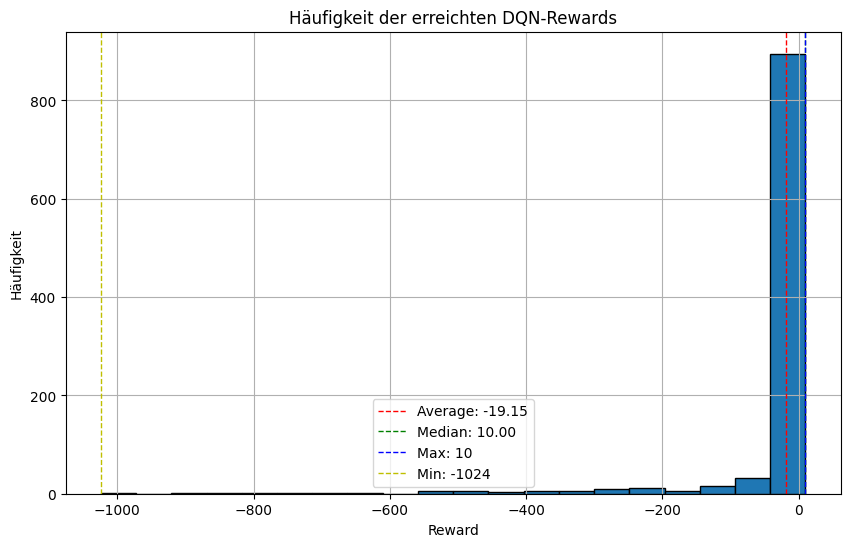

Average Reward: -19.15
Median Reward: 10.00
Max Reward: 10
Min Reward: -1024


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Datei mit den DQN-Rewards einlesen
dqn_rewards = []
with open("dqn_rewards.txt", "r") as reward_file:
    for line in reward_file:
        # Extrahiere den Reward aus jeder Zeile
        reward = int(line.split("Reward = ")[1])
        dqn_rewards.append(reward)

# Berechne statistische Kennzahlen
average_reward = np.mean(dqn_rewards)
median_reward = np.median(dqn_rewards)
max_reward = np.max(dqn_rewards)
min_reward = np.min(dqn_rewards)

# Erstelle ein Histogramm der DQN-Rewards
plt.figure(figsize=(10, 6))
plt.hist(dqn_rewards, bins=20, edgecolor='black')
plt.title('Häufigkeit der erreichten DQN-Rewards')
plt.xlabel('Reward')
plt.ylabel('Häufigkeit')
plt.grid(True)

# Füge statistische Kennzahlen zum Diagramm hinzu
plt.axvline(average_reward, color='r', linestyle='dashed', linewidth=1, label=f'Average: {average_reward:.2f}')
plt.axvline(median_reward, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_reward:.2f}')
plt.axvline(max_reward, color='b', linestyle='dashed', linewidth=1, label=f'Max: {max_reward}')
plt.axvline(min_reward, color='y', linestyle='dashed', linewidth=1, label=f'Min: {min_reward}')
plt.legend()

plt.show()

# Ausgabe der statistischen Kennzahlen
print(f"Average Reward: {average_reward:.2f}")
print(f"Median Reward: {median_reward:.2f}")
print(f"Max Reward: {max_reward}")
print(f"Min Reward: {min_reward}")

Die Probleme die sich bei diesem ersten Versuch zeigen ist das die KI keine reward über 10 erreicht und ansonsten nur negative Werte erreicht. Die 10 Basis reward bekommt es zum Start des Spiels da für das erreichen jedes neuen Floors ein Bonus von 10 gegeben wird. In den Logs konnte man erkennen das die Ki hauptsächlich als Aktion "End Turn" wählt.

Eine Ursache für das fehlende besserwereden, könnte sein, dass das Töten eines Gegners zu schwierig für die KI ist. Stattdessen lernt sie ihr Punishment zu minimieren in dem sie "End Turn" wählt. Diese Aktion kann nur dann zu einem negativen Outcome führen wenn vorher ein "Strike" gespielt wurde, da danach ausgewählt werden muss welcher gegner angegriffen wird. In diesem Fall sollte es helfen Rewards dafür zu geben 

Es könnte sein das relative kleine Neuronale Netzwerk aus drei Linear Layern zu klein ist und nenneswert etwas zu lernen. Es könnte daher helfen mehr und größere Layer zum lernen zu nehmen.

Eine Dritte Möglichkeit ist das der Ki die Informationen fehlen um tatsächlich sinnvolle Entscheidungen zu treffen. Beim Kontrollieren des machinereableState musste ich feststellen, das es gar nicht gesagtbekommt, Wie die welt.situation grade aussieht. In dieser Variable soll gespeichert werden, in welcher Situation die Welt sich befindet und daher sollte die KI auch lernen, welche Aktionen es je nach Situation wählen sollte.

Diese Problem werde ich zuerst einmal angehen und sehen, ob sich dadurch das Problem lösen lässt, ohne der KI kleine Hilfen durch zusätzliche Belohnung zu geben.

In [ ]:

%run world.py

import random
from world import World

# Hyperparameter
batch_size = 32
n_episodes = 1

# Initialisieren des 2 DQN-Agenten nun mit Variable für Situation und currently playing Card

#erstellene einer Testwelt
seed = random.randint(0, 1000000)
welt = World(seed=seed)
# holen der Beispielstates aus der Testwelt. Dadurch muss ich nach Anpassungen an der Weltklasse nicht die Werte anpassen
example_actionspace= welt.get_entire_action_space()
example_gamestate = welt.get_state_machinereadble()


state_size = len(example_gamestate)
action_size = len(example_actionspace)
print("State Size:",state_size)
print("Action Size:",action_size)
agent = DQNAgent(state_size, action_size)

# Datei zum Speichern der Rewards öffnen
with open("dqn_rewards_2.txt", "w") as reward_file:
    for e in range(n_episodes):
        # Generiere einen zufälligen Seed
        seed = random.randint(0, 1000000)
        startseed = seed
        
        # Erstelle eine neue Welt mit automatischem Spielen
        welt = World(seed=seed, autoplay=False,out_print=False)
        done = False
        
        # Initialisieren des Zustands
        state = np.array(welt.get_state_machinereadble())
        
        while True:
            # entire Actionspace holen
            actionspace = welt.get_entire_action_space()
            
            # Action auswählen
            action = agent.act(state)
            # Action ausführen
            welt.take_action(actionspace[action])
            next_state = np.array(welt.get_state_machinereadble())
            reward = welt.get_reward()
            done = welt.situation == "Game Over"
            
            # Speichern der Erfahrung im Replay-Speicher
            agent.remember(state, action, reward, next_state, done)
            
            # Zustand aktualisieren
            state = next_state
            
            # Replay ausführen, wenn genügend Erfahrungen gesammelt wurden
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
            
            if done:
                break
        
        # Reward sammeln und in die Datei schreiben
        reward = welt.get_reward()
        reward_file.write(f"Episode {e+1}: Seed={startseed}; Reward = {reward}\n")
        print(f"Episode {e+1}: Reward = {reward}")

print("Alle Episoden abgeschlossen und Rewards gespeichert.")

State Size: 48
Action Size: 8
Episode 1: Reward = -152
Alle Episoden abgeschlossen und Rewards gespeichert.


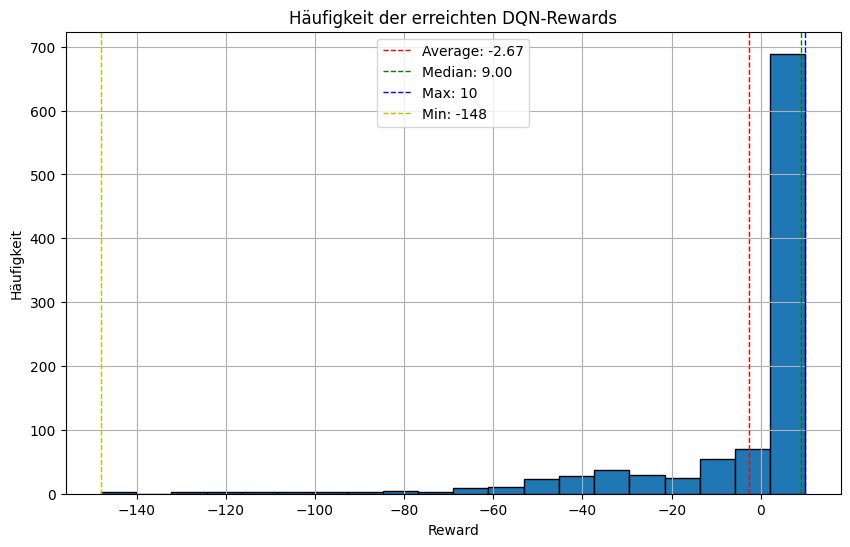

Average Reward: -2.67
Median Reward: 9.00
Max Reward: 10
Min Reward: -148


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Datei mit den DQN-Rewards einlesen
dqn_rewards = []
with open("dqn_rewards_2.txt", "r") as reward_file:
    for line in reward_file:
        # Extrahiere den Reward aus jeder Zeile
        reward = int(line.split("Reward = ")[1])
        dqn_rewards.append(reward)

# Berechne statistische Kennzahlen
average_reward = np.mean(dqn_rewards)
median_reward = np.median(dqn_rewards)
max_reward = np.max(dqn_rewards)
min_reward = np.min(dqn_rewards)

# Erstelle ein Histogramm der DQN-Rewards
plt.figure(figsize=(10, 6))
plt.hist(dqn_rewards, bins=20, edgecolor='black')
plt.title('Häufigkeit der erreichten DQN-Rewards')
plt.xlabel('Reward')
plt.ylabel('Häufigkeit')
plt.grid(True)

# Füge statistische Kennzahlen zum Diagramm hinzu
plt.axvline(average_reward, color='r', linestyle='dashed', linewidth=1, label=f'Average: {average_reward:.2f}')
plt.axvline(median_reward, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_reward:.2f}')
plt.axvline(max_reward, color='b', linestyle='dashed', linewidth=1, label=f'Max: {max_reward}')
plt.axvline(min_reward, color='y', linestyle='dashed', linewidth=1, label=f'Min: {min_reward}')
plt.legend()

plt.show()

# Ausgabe der statistischen Kennzahlen
print(f"Average Reward: {average_reward:.2f}")
print(f"Median Reward: {median_reward:.2f}")
print(f"Max Reward: {max_reward}")
print(f"Min Reward: {min_reward}")

Zu Erkennen nach diesem Versuch ist, dass die KI im Durchschnitt deutlich besser abschneidet, seid dem sie die Situationsvariable bekommen hat. Sie scheint weniger häufig absolut katastrophale negative Ergebnisse zu erzeugen, insofern scheint sie zu lernen je nach situation besser zu handeln um negativen Werte zu verhindern. Sie hat es dennoch nicht geschafft auch nur einen gegner zu besiegen. Bevor ich mich jedoch an den Versuch mache neue Rewards zu verteilen um der KI beim lernen zu helfen, ist mir noch ein Fehler in meiner Implementation aufgefallen. So bekommt die KI jede Iteration den aufsummierten Reward all ihrer Aktionen zurück. Das ist für den Deep Q-Networks Algorithmus genau das falsche. Insofern will ich zunächst einmal versuchen, ob das Training mit korrekter Reward Struktur besser funktioniert. Desweitern werde ich die Reward für das erreichen des ersten Floor abstellen, um so hoffentlich das Explorieren am Anfang zu erleichtern   

In [5]:

%run world.py

import random
from world import World

# Hyperparameter
batch_size = 32
n_episodes = 1

# Initialisieren des 2 DQN-Agenten nun mit Variable für Situation und currently playing Card

#erstellene einer Testwelt
seed = random.randint(0, 1000000)
welt = World(seed=seed)
# holen der Beispielstates aus der Testwelt. Dadurch muss ich nach Anpassungen an der Weltklasse nicht die Werte anpassen
example_actionspace= welt.get_entire_action_space()
example_gamestate = welt.get_state_machinereadble()


state_size = len(example_gamestate)
action_size = len(example_actionspace)
print("State Size:",state_size)
print("Action Size:",action_size)
agent = DQNAgent(state_size, action_size)

# Datei zum Speichern der Rewards öffnen
with open("dqn_rewards_3.txt", "w") as reward_file:
    for e in range(n_episodes):
        # Generiere einen zufälligen Seed
        seed = random.randint(0, 1000000)
        startseed = seed
        
        # Erstelle eine neue Welt mit automatischem Spielen
        welt = World(seed=seed, autoplay=False,out_print=False)
        done = False
        
        # Initialisieren des Zustands
        state = np.array(welt.get_state_machinereadble())
        episode_reward = 0
        while True:
            # entire Actionspace holen
            actionspace = welt.get_entire_action_space()
            
            # Action auswählen
            action = agent.act(state)
            # Action ausführen
            #reward auf 0 setzen und dann gucken wie sich der reward durch die action verändert
            welt.reward = 0
            welt.take_action(actionspace[action])
            next_state = np.array(welt.get_state_machinereadble())
            reward = welt.get_reward()
            episode_reward += reward
            done = welt.situation == "Game Over"
            
            # Speichern der Erfahrung im Replay-Speicher
            agent.remember(state, action, reward, next_state, done)
            
            # Zustand aktualisieren
            state = next_state
            
            # Replay ausführen, wenn genügend Erfahrungen gesammelt wurden
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
            
            if done:
                break
        
        reward_file.write(f"Episode {e+1}: Seed={startseed}; Reward = {episode_reward}\n")
        print(f"Episode {e+1}: Reward = {episode_reward}")

print("Alle Episoden abgeschlossen und Rewards gespeichert.")

State Size: 48
Action Size: 8
Episode 1: Reward = -33
Alle Episoden abgeschlossen und Rewards gespeichert.


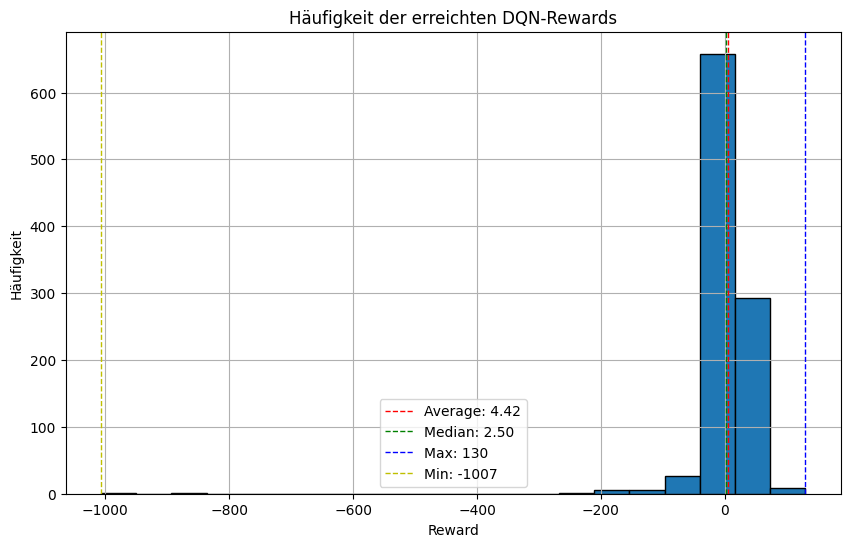

Average Reward: 4.42
Median Reward: 2.50
Max Reward: 130
Min Reward: -1007
Average Reward: 4.42
Median Reward: 2.50
Max Reward: 130
Min Reward: -1007


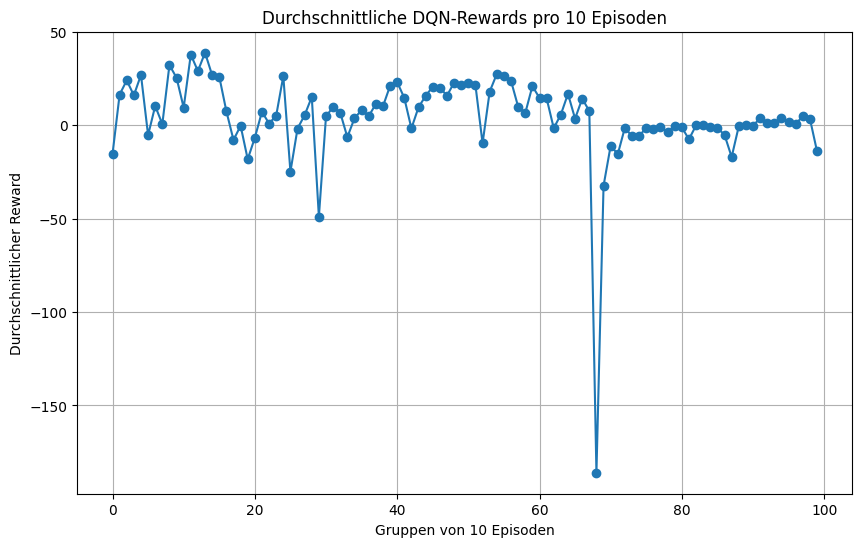

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Datei mit den DQN-Rewards einlesen
dqn_rewards = []
with open("dqn_rewards_3.txt", "r") as reward_file:
    for line in reward_file:
        # Extrahiere den Reward aus jeder Zeile
        reward = int(line.split("Reward = ")[1])
        dqn_rewards.append(reward)

# Berechne statistische Kennzahlen
average_reward = np.mean(dqn_rewards)
median_reward = np.median(dqn_rewards)
max_reward = np.max(dqn_rewards)
min_reward = np.min(dqn_rewards)

# Erstelle ein Histogramm der DQN-Rewards
plt.figure(figsize=(10, 6))
plt.hist(dqn_rewards, bins=20, edgecolor='black')
plt.title('Häufigkeit der erreichten DQN-Rewards')
plt.xlabel('Reward')
plt.ylabel('Häufigkeit')
plt.grid(True)

# Füge statistische Kennzahlen zum Diagramm hinzu
plt.axvline(average_reward, color='r', linestyle='dashed', linewidth=1, label=f'Average: {average_reward:.2f}')
plt.axvline(median_reward, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_reward:.2f}')
plt.axvline(max_reward, color='b', linestyle='dashed', linewidth=1, label=f'Max: {max_reward}')
plt.axvline(min_reward, color='y', linestyle='dashed', linewidth=1, label=f'Min: {min_reward}')
plt.legend()

plt.show()

# Ausgabe der statistischen Kennzahlen
print(f"Average Reward: {average_reward:.2f}")
print(f"Median Reward: {median_reward:.2f}")
print(f"Max Reward: {max_reward}")
print(f"Min Reward: {min_reward}")


# Ausgabe der statistischen Kennzahlen
print(f"Average Reward: {average_reward:.2f}")
print(f"Median Reward: {median_reward:.2f}")
print(f"Max Reward: {max_reward}")
print(f"Min Reward: {min_reward}")

# Berechne den durchschnittlichen Reward für Gruppen von 10 Episoden
group_size = 10
grouped_rewards = [np.mean(dqn_rewards[i:i + group_size]) for i in range(0, len(dqn_rewards), group_size)]

# Erstelle ein Liniendiagramm der durchschnittlichen Rewards
plt.figure(figsize=(10, 6))
plt.plot(grouped_rewards, marker='o')
plt.title('Durchschnittliche DQN-Rewards pro 10 Episoden')
plt.xlabel('Gruppen von 10 Episoden')
plt.ylabel('Durchschnittlicher Reward')
plt.grid(True)
plt.show()

Das Ändern, wie der KI die Rewards gegeben werden, hat wie hier zu Erkennen deutlich dabei geholfen, dass die Ki richtige Entscheidungen trifft. Zum ersten mal erreicht die KI tatsächlich positive Werte und scheint zu Beginn auch regelmäßig Gegner zu besiegen. Jedoch scheitert es im Verlauf des weiteren Training und scheint schlussendlich wieder schlechter zu werden. Wenn man sich die log für eine der letzen Kämpfe ausgeben lässt so zeigt sich das die dominate Stratgie, nun nicht mehr "End Turn", sondern "Play Card 2" ist. Auf die Situation angepasst dann auch einen gegner auszuwählen passiert eher mit großem Zufall. So endet die KI in Kämpfen mit mehr als einen Gegner in einer Art fast endlosschleife von spiele eine "Strike" Karte und dann versuche weiter karten zu spielen, anstatt ein Ziel auszuwählen. Nach diesem sehr Interessanten ersten Erfolg, werde ich ausprobieren ob die KI mit gleicher Reward Struktur aber größerem "Hirn" zu einem besseren ergebnis kommt.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque
from world import World

# Überprüfen, ob eine GPU verfügbar ist
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 40)
        self.fc2 = nn.Linear(40, 35)
        self.fc3 = nn.Linear(35, 30)
        self.fc4 = nn.Linear(30, 25)
        self.fc5 = nn.Linear(25, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = DQN(state_size, action_size).to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.MSELoss()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        act_values = self.model(state)
        return torch.argmax(act_values[0]).item()

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                next_state = torch.FloatTensor(next_state).unsqueeze(0).to(device)
                target = (reward + self.gamma * torch.max(self.model(next_state)[0]).item())
            state = torch.FloatTensor(state).unsqueeze(0).to(device)
            target_f = self.model(state)
            target_f[0][action] = target
            self.optimizer.zero_grad()
            loss = self.criterion(target_f, self.model(state))
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [10]:

%run world.py

import random
from world import World

# Hyperparameter
batch_size = 32
n_episodes = 1

# Initialisieren des 2 DQN-Agenten nun mit Variable für Situation und currently playing Card

#erstellene einer Testwelt
seed = random.randint(0, 1000000)
welt = World(seed=seed)
# holen der Beispielstates aus der Testwelt. Dadurch muss ich nach Anpassungen an der Weltklasse nicht die Werte anpassen
example_actionspace= welt.get_entire_action_space()
example_gamestate = welt.get_state_machinereadble()


state_size = len(example_gamestate)
action_size = len(example_actionspace)
print("State Size:",state_size)
print("Action Size:",action_size)
agent = DQNAgent(state_size, action_size)

# Datei zum Speichern der Rewards öffnen
with open("dqn_rewards_4.txt", "w") as reward_file:
    for e in range(n_episodes):
        # Generiere einen zufälligen Seed
        seed = random.randint(0, 1000000)
        startseed = seed
        
        # Erstelle eine neue Welt mit automatischem Spielen
        welt = World(seed=seed, autoplay=False,out_print=False)
        done = False
        
        # Initialisieren des Zustands
        state = np.array(welt.get_state_machinereadble())
        episode_reward = 0
        while True:
            # entire Actionspace holen
            actionspace = welt.get_entire_action_space()
            
            # Action auswählen
            action = agent.act(state)
            # Action ausführen
            #reward auf 0 setzen und dann gucken wie sich der reward durch die action verändert
            welt.reward = 0
            welt.take_action(actionspace[action])
            next_state = np.array(welt.get_state_machinereadble())
            reward = welt.get_reward()
            episode_reward += reward
            done = welt.situation == "Game Over"
            
            # Speichern der Erfahrung im Replay-Speicher
            agent.remember(state, action, reward, next_state, done)
            
            # Zustand aktualisieren
            state = next_state
            
            # Replay ausführen, wenn genügend Erfahrungen gesammelt wurden
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
            
            if done:
                break
        
        reward_file.write(f"Episode {e+1}: Seed={startseed}; Reward = {episode_reward}\n")
        print(f"Episode {e+1}: Reward = {episode_reward}")

print("Alle Episoden abgeschlossen und Rewards gespeichert.")

State Size: 48
Action Size: 8
Episode 1: Reward = -132
Alle Episoden abgeschlossen und Rewards gespeichert.


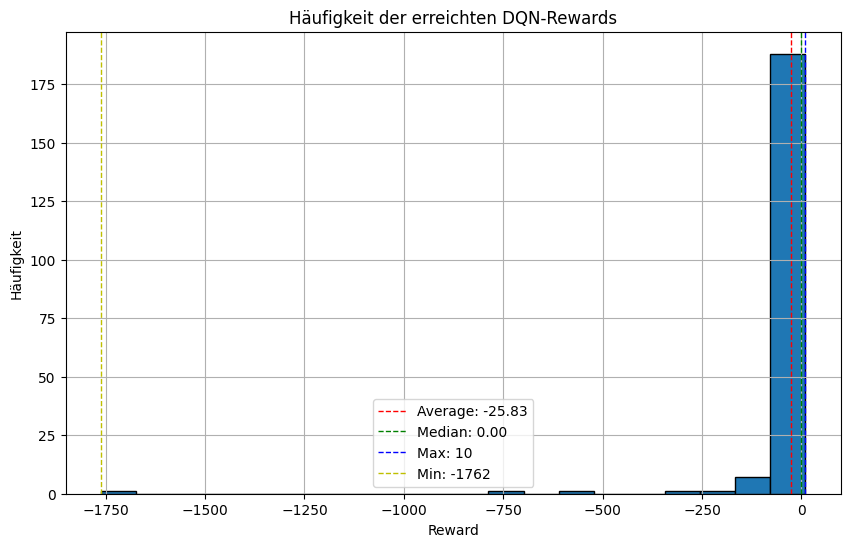

Average Reward: -25.83
Median Reward: 0.00
Max Reward: 10
Min Reward: -1762
Average Reward: -25.83
Median Reward: 0.00
Max Reward: 10
Min Reward: -1762


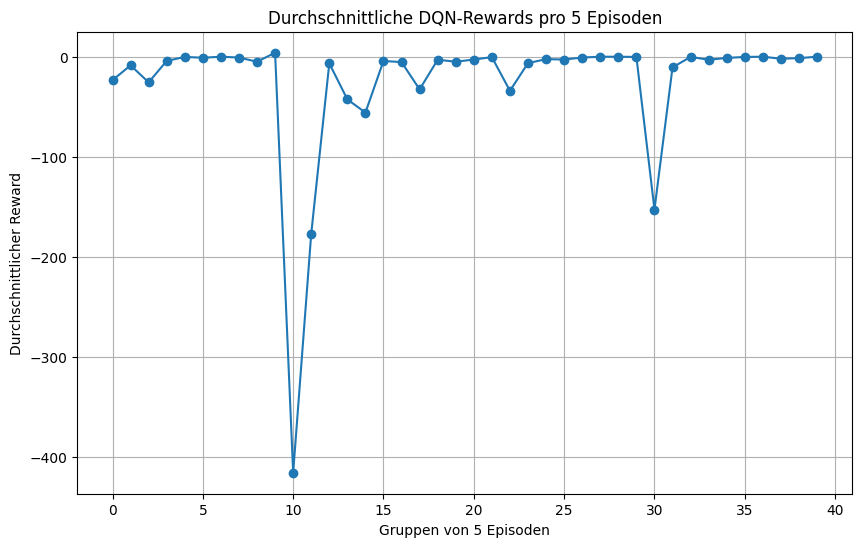

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Datei mit den DQN-Rewards einlesen
dqn_rewards = []
with open("dqn_rewards_4.txt", "r") as reward_file:
    for line in reward_file:
        # Extrahiere den Reward aus jeder Zeile
        reward = int(line.split("Reward = ")[1])
        dqn_rewards.append(reward)

# Berechne statistische Kennzahlen
average_reward = np.mean(dqn_rewards)
median_reward = np.median(dqn_rewards)
max_reward = np.max(dqn_rewards)
min_reward = np.min(dqn_rewards)

# Erstelle ein Histogramm der DQN-Rewards
plt.figure(figsize=(10, 6))
plt.hist(dqn_rewards, bins=20, edgecolor='black')
plt.title('Häufigkeit der erreichten DQN-Rewards')
plt.xlabel('Reward')
plt.ylabel('Häufigkeit')
plt.grid(True)

# Füge statistische Kennzahlen zum Diagramm hinzu
plt.axvline(average_reward, color='r', linestyle='dashed', linewidth=1, label=f'Average: {average_reward:.2f}')
plt.axvline(median_reward, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_reward:.2f}')
plt.axvline(max_reward, color='b', linestyle='dashed', linewidth=1, label=f'Max: {max_reward}')
plt.axvline(min_reward, color='y', linestyle='dashed', linewidth=1, label=f'Min: {min_reward}')
plt.legend()

plt.show()

# Ausgabe der statistischen Kennzahlen
print(f"Average Reward: {average_reward:.2f}")
print(f"Median Reward: {median_reward:.2f}")
print(f"Max Reward: {max_reward}")
print(f"Min Reward: {min_reward}")


# Ausgabe der statistischen Kennzahlen
print(f"Average Reward: {average_reward:.2f}")
print(f"Median Reward: {median_reward:.2f}")
print(f"Max Reward: {max_reward}")
print(f"Min Reward: {min_reward}")

# Berechne den durchschnittlichen Reward für Gruppen von 5 Episoden
group_size = 5
grouped_rewards = [np.mean(dqn_rewards[i:i + group_size]) for i in range(0, len(dqn_rewards), group_size)]

# Erstelle ein Liniendiagramm der durchschnittlichen Rewards
plt.figure(figsize=(10, 6))
plt.plot(grouped_rewards, marker='o')
plt.title('Durchschnittliche DQN-Rewards pro 5 Episoden')
plt.xlabel('Gruppen von 5 Episoden')
plt.ylabel('Durchschnittlicher Reward')
plt.grid(True)
plt.show()

Beim Versuch mit mehr und größeren linear Layern hat sich nach eine Verschlechterung ergeben. Es scheint nie herausgefunden zu haben wie es einen Gegner töten kann und hat daher nur nur gelernt keine Fehlpunkte zu bekommen und sich bei 0 rewards einzupendeln. Tatsächlich war das kleiner Netzwerk besser darin für den Erfolg zu optimieren. Insofern kann meine Hypothese das es an einem zu kleinen "Gehirn" liegt wohl nicht stimmen. Als nächste wird daher überprüft ob es durch kleinere Rewards für Schaden verursachen mehr erfolge erziehlt werden. Insofern muss zunächst einmal der Quellcode angepasst werden. 

Der Reward für das Spielen einer Karte ist jetzt 1, für das auswählen eines Ziel 2. Da Es für die KI schwieriger ist festzustellen wann es den ein Ziel auswählen kann, dachte ich dies sollte stärker belohnt werden. Das Erreichen eines neuen Floor wird jetzt mit 20 Punkten belohnt. Eine Sorge die ich grundsätzlich habe ist, das die KI lernt nur Verteidigungskarten zu spielen und so versucht möglichst lange in einem Kampf zu bleiben, anstatt weiter zu kommen. Mal sehen ob es zu dieser Entwicklung kommt. Die Folgenden Tests werden wieder mit kleinerem linear layer durchgeführt da diese ja vorher gut genug funktioniert haben.


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque
from world import World

# Überprüfen, ob eine GPU verfügbar ist
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = DQN(state_size, action_size).to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.MSELoss()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        act_values = self.model(state)
        return torch.argmax(act_values[0]).item()

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                next_state = torch.FloatTensor(next_state).unsqueeze(0).to(device)
                target = (reward + self.gamma * torch.max(self.model(next_state)[0]).item())
            state = torch.FloatTensor(state).unsqueeze(0).to(device)
            target_f = self.model(state)
            target_f[0][action] = target
            self.optimizer.zero_grad()
            loss = self.criterion(target_f, self.model(state))
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [13]:
import random
from world import World

# Hyperparameter
batch_size = 32
n_episodes = 1

# Initialisieren des 2 DQN-Agenten nun mit Variable für Situation und currently playing Card

#erstellene einer Testwelt
seed = random.randint(0, 1000000)
welt = World(seed=seed)
# holen der Beispielstates aus der Testwelt. Dadurch muss ich nach Anpassungen an der Weltklasse nicht die Werte anpassen
example_actionspace= welt.get_entire_action_space()
example_gamestate = welt.get_state_machinereadble()


state_size = len(example_gamestate)
action_size = len(example_actionspace)
print("State Size:",state_size)
print("Action Size:",action_size)
agent = DQNAgent(state_size, action_size)

# Datei zum Speichern der Rewards öffnen
with open("dqn_rewards_5.txt", "w") as reward_file:
    for e in range(n_episodes):
        # Generiere einen zufälligen Seed
        seed = random.randint(0, 1000000)
        startseed = seed
        
        # Erstelle eine neue Welt mit automatischem Spielen
        welt = World(seed=seed, autoplay=False,out_print=False)
        done = False
        
        # Initialisieren des Zustands
        state = np.array(welt.get_state_machinereadble())
        episode_reward = 0
        while True:
            # entire Actionspace holen
            actionspace = welt.get_entire_action_space()
            
            # Action auswählen
            action = agent.act(state)
            # Action ausführen
            #reward auf 0 setzen und dann gucken wie sich der reward durch die action verändert
            welt.reward = 0
            welt.take_action(actionspace[action])
            next_state = np.array(welt.get_state_machinereadble())
            reward = welt.get_reward()
            episode_reward += reward
            done = welt.situation == "Game Over"
            
            # Speichern der Erfahrung im Replay-Speicher
            agent.remember(state, action, reward, next_state, done)
            
            # Zustand aktualisieren
            state = next_state
            
            # Replay ausführen, wenn genügend Erfahrungen gesammelt wurden
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
            
            if done:
                break
        
        reward_file.write(f"Episode {e+1}: Seed={startseed}; Reward = {episode_reward}; Floor={welt.floor_number}\n")
        print(f"Episode {e+1}: Reward = {episode_reward}")

print("Alle Episoden abgeschlossen und Rewards gespeichert.")

State Size: 48
Action Size: 8
Episode 1: Reward = -116
Alle Episoden abgeschlossen und Rewards gespeichert.


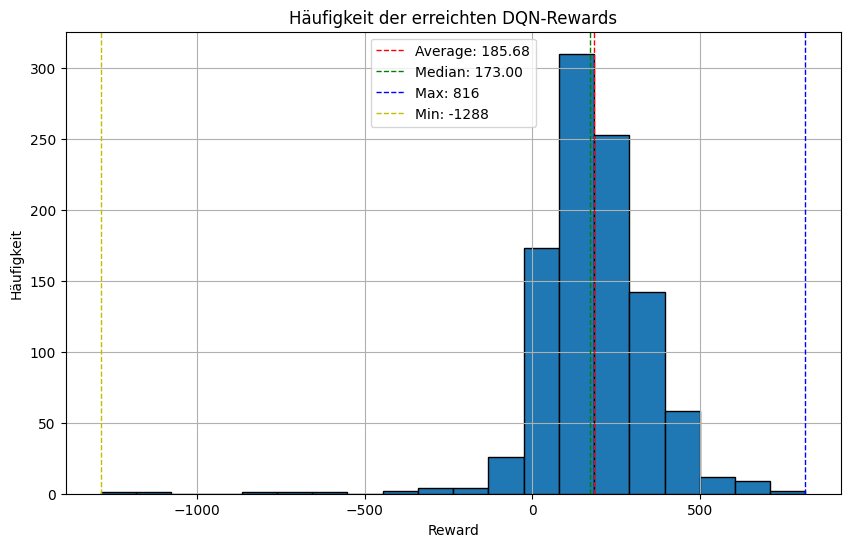

Average Reward: 185.68
Median Reward: 173.00
Max Reward: 816
Min Reward: -1288


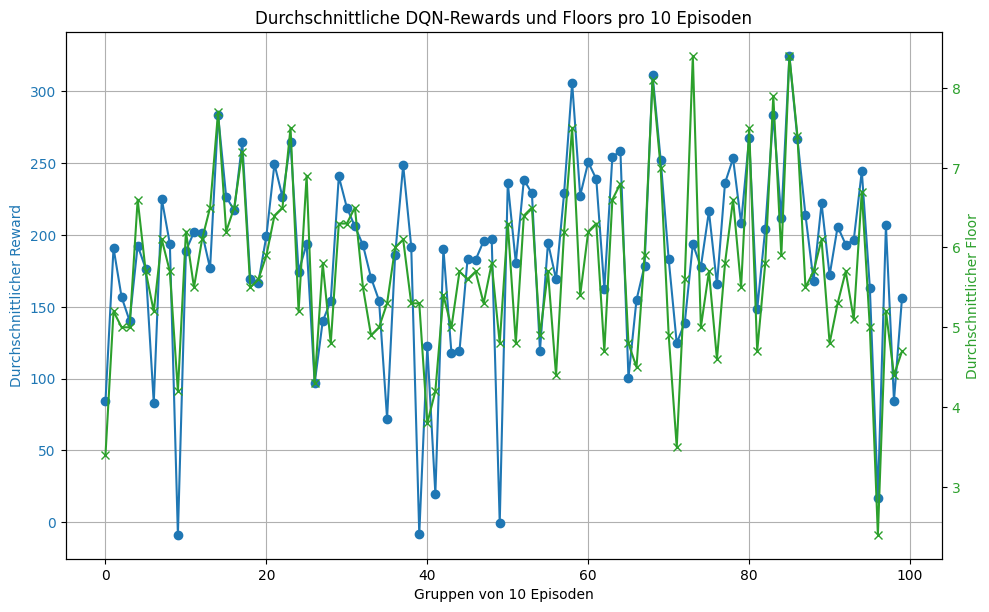

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Datei mit den DQN-Rewards einlesen
dqn_rewards = []
floors = []
with open("dqn_rewards_5.txt", "r") as reward_file:
    for line in reward_file:
        # Extrahiere den Reward und den Floor aus jeder Zeile
        parts = line.split(";")
        reward = int(parts[1].split("Reward = ")[1])
        floor = int(parts[2].split("Floor=")[1])
        dqn_rewards.append(reward)
        floors.append(floor)

# Berechne statistische Kennzahlen
average_reward = np.mean(dqn_rewards)
median_reward = np.median(dqn_rewards)
max_reward = np.max(dqn_rewards)
min_reward = np.min(dqn_rewards)

# Erstelle ein Histogramm der DQN-Rewards
plt.figure(figsize=(10, 6))
plt.hist(dqn_rewards, bins=20, edgecolor='black')
plt.title('Häufigkeit der erreichten DQN-Rewards')
plt.xlabel('Reward')
plt.ylabel('Häufigkeit')
plt.grid(True)

# Füge statistische Kennzahlen zum Diagramm hinzu
plt.axvline(average_reward, color='r', linestyle='dashed', linewidth=1, label=f'Average: {average_reward:.2f}')
plt.axvline(median_reward, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_reward:.2f}')
plt.axvline(max_reward, color='b', linestyle='dashed', linewidth=1, label=f'Max: {max_reward}')
plt.axvline(min_reward, color='y', linestyle='dashed', linewidth=1, label=f'Min: {min_reward}')
plt.legend()

plt.show()

# Ausgabe der statistischen Kennzahlen
print(f"Average Reward: {average_reward:.2f}")
print(f"Median Reward: {median_reward:.2f}")
print(f"Max Reward: {max_reward}")
print(f"Min Reward: {min_reward}")

# Berechne den durchschnittlichen Reward für Gruppen von 10 Episoden
group_size = 10
grouped_rewards = [np.mean(dqn_rewards[i:i + group_size]) for i in range(0, len(dqn_rewards), group_size)]
grouped_floors = [np.mean(floors[i:i + group_size]) for i in range(0, len(floors), group_size)]

# Erstelle ein Liniendiagramm der durchschnittlichen Rewards und Floors
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Gruppen von 10 Episoden')
ax1.set_ylabel('Durchschnittlicher Reward', color=color)
ax1.plot(grouped_rewards, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Durchschnittlicher Floor', color=color)  # we already handled the x-label with ax1
ax2.plot(grouped_floors, marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Durchschnittliche DQN-Rewards und Floors pro 10 Episoden')
plt.show()

In [ ]:

#Playtesting des frisch trainierten Agent
seed=19332
welt = World(seed=seed,autoplay=False)
welt.get_state_human()
print("anfang12")
episode_reward=0
while welt.situation != "Game Over":
    #gamestate holen
    #gamestate = welt.get_state_human()
    #print(gamestate)
    #actionspace holen
    all_actionspace = welt.get_action_space()
    #print("ActionSpace:",all_actionspace)
    #action auswählen
    actionspace = welt.get_entire_action_space()

    # Action auswählen
    action = agent.act(state)
    # Action ausführen
    #reward auf 0 setzen und dann gucken wie sich der reward durch die action verändert
    welt.reward = 0
    welt.take_action(actionspace[action])
    reward = welt.get_reward()
    episode_reward += reward    
    print("Bisherige Rewards: ", episode_reward)
    print("Momentaner Rewards: ", reward)
    print("Aktion: ", actionspace[action])
print("Reward gesammelt:", episode_reward)

Das Ergebnis diese Training ist das die KI zu Anfang weiterhin dazu lernt aber relativ bald einen gewissen Höhepunkt erreichen und schließlich auch wieder schlechter zu werden scheinen. Zumindest scheint der durchschnittliche Floor der erreicht wird, zum großen Teil auch mit dem Rewards übereinzustimmen. Es kommt also nicht zu einem Zustand in der die KI einen einzigen Kampf für große Rewards farmt in dem es immer wieder Karten spielt, ohne den Gegner zu töten. Beim Testen des Agents nach dem 1000 durchläufen konnte ich das Bekannte Problem von "Play Card 2" in endlosser abfolge wieder feststellen. Nur alle 100 bis 1000 Versuche würde die KI "End turn" stattdessen auswählen, insofern wundert es mich überhaupt das die Ki so gute Belohnung bekommt. Der update Schritt der KI scheint essentiel dafür zu sein das es sich dafür entscheidet andere Dinge als "Play Card 2" zu machen.

Da die richtige Reinfolge von End turn und play card immer noch ein fundamentales problem zu sein scheint, werde ich noch einmal versuchen die Rewards anzupassen auf das die Ki lernt richtig zu handeln. Dazu werde ich der Welt eine Variable coutinous_invalid_action geben welche für jede aufeinanderfolgen invalide Aktion hochgezählt wird. Der negative reward für die invalid action wird davon abhängen und somit immer größer werden, und erst durch eine richtige Aktion wieder auf 0 gesetzt. Invalid action wird der Maschiene auch als State mitgegeben da es sonst im gleichen State für die gleich aktion unterschiedliche negative Rewards bekommen würde. Eine Weiter Idee wäre das Spiel frühzeitig zu beenden wann immer die KI zu häufig invalide Optionen wählt, genauso wie mit dem Decay der Rewards im allgemeinen zu experimentieren

In [2]:
import random
from world import World

# Hyperparameter
batch_size = 32
n_episodes = 1

# Initialisieren des 2 DQN-Agenten nun mit Variable für Situation und currently playing Card

#erstellene einer Testwelt
seed = random.randint(0, 1000000)
welt = World(seed=seed)
# holen der Beispielstates aus der Testwelt. Dadurch muss ich nach Anpassungen an der Weltklasse nicht die Werte anpassen
example_actionspace= welt.get_entire_action_space()
example_gamestate = welt.get_state_machinereadble()


state_size = len(example_gamestate)
action_size = len(example_actionspace)
print("State Size:",state_size)
print("Action Size:",action_size)
agent = DQNAgent(state_size, action_size)

# Datei zum Speichern der Rewards öffnen
with open("dqn_rewards_6.txt", "w") as reward_file:
    for e in range(n_episodes):
        # Generiere einen zufälligen Seed
        seed = random.randint(0, 1000000)
        startseed = seed
        
        # Erstelle eine neue Welt mit automatischem Spielen
        welt = World(seed=seed, autoplay=False,out_print=False)
        done = False
        
        # Initialisieren des Zustands
        state = np.array(welt.get_state_machinereadble())
        episode_reward = 0
        while True:
            # entire Actionspace holen
            actionspace = welt.get_entire_action_space()
            
            # Action auswählen
            action = agent.act(state)
            # Action ausführen
            #reward auf 0 setzen und dann gucken wie sich der reward durch die action verändert
            welt.reward = 0
            welt.take_action(actionspace[action])
            next_state = np.array(welt.get_state_machinereadble())
            reward = welt.get_reward()
            episode_reward += reward
            done = welt.situation == "Game Over"
            
            # Speichern der Erfahrung im Replay-Speicher
            agent.remember(state, action, reward, next_state, done)
            
            # Zustand aktualisieren
            state = next_state
            
            # Replay ausführen, wenn genügend Erfahrungen gesammelt wurden
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
            
            if done:
                break
        
        reward_file.write(f"Episode {e+1}: Seed={startseed}; Reward = {episode_reward}; Floor={welt.floor_number}\n")
        print(f"Episode {e+1}: Reward = {episode_reward}")

print("Alle Episoden abgeschlossen und Rewards gespeichert.")

State Size: 49
Action Size: 8
Episode 1: Reward = -887
Alle Episoden abgeschlossen und Rewards gespeichert.


[-534, -2, -71, 162, 99, 164, 129, 57, 273, 284, 284, 108, 509, 367, 99, 301, 193, -2871, 250, 60, 266, 169, 90, 61, 183, 194, 85, 201, -974, -272, 75, 93, 229, 197, 371, 253, 37, 88, 58, 125, 40, -101, 22, -98, -660, 56, 204, 77, 234, 160, 110, 386, 504, -43, 147, 13, 130, 191, 113, 355, 143, 148, 131, 125, 87, 11, 126, 76, 243, 307, 47, 34, 216, 157, 172, 103, 124, 49, 175, 227, 69, 260, 97, 178, 103, 237, 136, 105, 10, 162, 115, 167, 341, 256, 236, 233, 198, 180, 176, 382, 254, 208, 222, 310, 187, 37, 155, 484, 250, 324, 165, 57, 489, 88, 301, 72, 353, 261, 345, 149, -1613, 401, 372, 230, 184, -1060, 147, 331, 139, 99, 16, 171, 166, -2000, -7398, -3, -1043, -501, -2167, -880, -419, -191, -1740, 173, 129, 100, 98, 93, 71, 175, 133, 64, 183, 188, 62, 130, 113, 177, 167, -42, 140, 160, 23, 49, 19, 69, 315, -9704, -13, -318, -30, -55, -37, -2627, 21, 39, 2, 78, 36, -242, 14, 116, 175, 193, -36, 20, -36, 258, 192, 354, 233, 237, 312, 222, 59, 175, 81, 224, -456, 524, -498435, -2, -921, -

Text(0.5, 1.0, 'Durchschnittliche DQN-Rewards und Floors pro 10 Episoden')

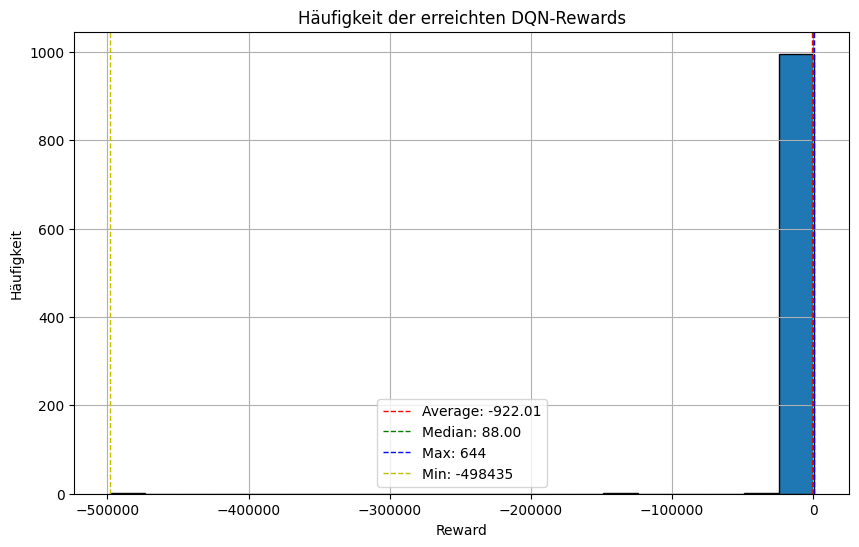

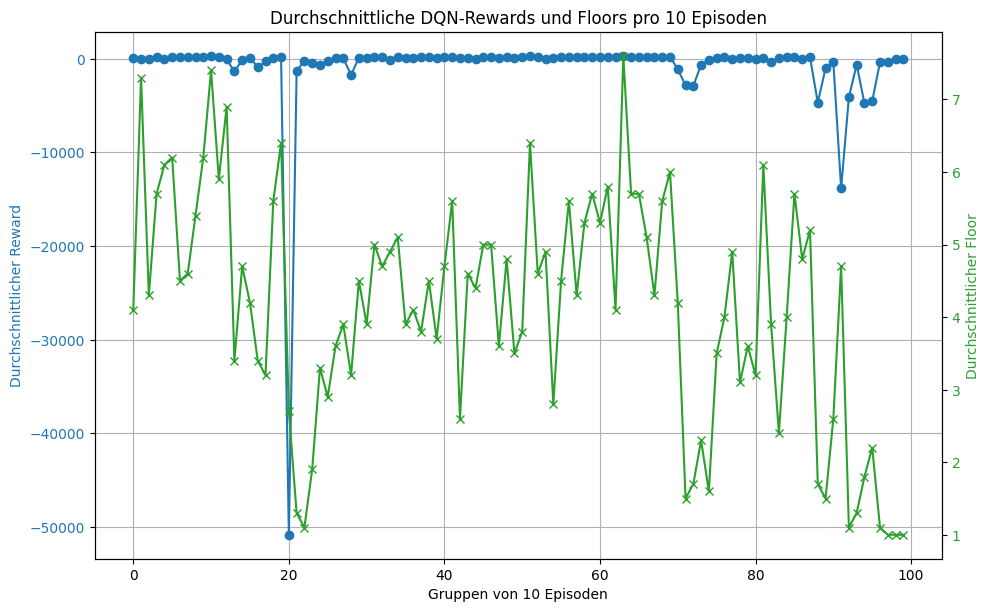

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datei mit den DQN-Rewards einlesen
dqn_rewards = []
floors = []
with open("dqn_rewards_6.txt", "r") as reward_file:
    for line in reward_file:
        # Extrahiere den Reward und den Floor aus jeder Zeile
        parts = line.split(";")
        reward = int(parts[1].split("Reward = ")[1])
        floor = int(parts[2].split("Floor=")[1])
        dqn_rewards.append(reward)
        floors.append(floor)
#print(dqn_rewards)
# Berechne statistische Kennzahlen
average_reward = np.mean(dqn_rewards)
median_reward = np.median(dqn_rewards)
max_reward = np.max(dqn_rewards)
min_reward = np.min(dqn_rewards)

# Erstelle ein Histogramm der DQN-Rewards
plt.figure(figsize=(10, 6))
plt.hist(dqn_rewards, bins=20, edgecolor='black')
plt.title('Häufigkeit der erreichten DQN-Rewards')
plt.xlabel('Reward')
plt.ylabel('Häufigkeit')
plt.grid(True)

# Füge statistische Kennzahlen zum Diagramm hinzu
plt.axvline(average_reward, color='r', linestyle='dashed', linewidth=1, label=f'Average: {average_reward:.2f}')
plt.axvline(median_reward, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_reward:.2f}')
plt.axvline(max_reward, color='b', linestyle='dashed', linewidth=1, label=f'Max: {max_reward}')
plt.axvline(min_reward, color='y', linestyle='dashed', linewidth=1, label=f'Min: {min_reward}')
plt.legend()

plt.show()

# Ausgabe der statistischen Kennzahlen
print(f"Average Reward: {average_reward:.2f}")
print(f"Median Reward: {median_reward:.2f}")
print(f"Max Reward: {max_reward}")
print(f"Min Reward: {min_reward}")

# Berechne den durchschnittlichen Reward für Gruppen von 10 Episoden
group_size = 10
grouped_rewards = [np.mean(dqn_rewards[i:i + group_size]) for i in range(0, len(dqn_rewards), group_size)]
grouped_floors = [np.mean(floors[i:i + group_size]) for i in range(0, len(floors), group_size)]

# Erstelle ein Liniendiagramm der durchschnittlichen Rewards und Floors
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Gruppen von 10 Episoden')
ax1.set_ylabel('Durchschnittlicher Reward', color=color)
ax1.plot(grouped_rewards, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Durchschnittlicher Floor', color=color)  # we already handled the x-label with ax1
ax2.plot(grouped_floors, marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Durchschnittliche DQN-Rewards und Floors pro 10 Episoden')
plt.show()

Es scheint so als hätte die Veränderung das immer wieder fälschliche Aktionen stärker und stärker bestraft werden auf lange Sicht keine positive Auswirkung auf die Performance der KI. Immernoch scheint sie zu Anfang besser zu werden wobei sie gegen Ende dann wieder schlechter wird und auch extrem negative Belohnungen anhäuft. Der Agent hat nach den 1000 durchläufen anscheinend gelernt "Play Card 4" häufig zu machen, was tatsächlich schlechter ist als immer "Play Card 2" zu machen, da die vierte Karte auch "leer" sein kann wenn schon zweimal Karte 2 gespielt wurde.

Als einen nächsten Versuch wird nun das Spiel beendet wenn 5 mal versucht wird, falsche Aktionen durchzuführen und zusätzlich ein negative reward von -20 gegeben. Vielleicht schafft die KI es so besser richtige Aktionen durchzuführen. 

In [6]:
import random
from world import World

# Hyperparameter
batch_size = 32
n_episodes = 1

# Initialisieren des 2 DQN-Agenten nun mit Variable für Situation und currently playing Card

#erstellene einer Testwelt
seed = random.randint(0, 1000000)
welt = World(seed=seed)
# holen der Beispielstates aus der Testwelt. Dadurch muss ich nach Anpassungen an der Weltklasse nicht die Werte anpassen
example_actionspace= welt.get_entire_action_space()
example_gamestate = welt.get_state_machinereadble()


state_size = len(example_gamestate)
action_size = len(example_actionspace)
print("State Size:",state_size)
print("Action Size:",action_size)
agent = DQNAgent(state_size, action_size)

# Datei zum Speichern der Rewards öffnen
with open("dqn_rewards_7.txt", "w") as reward_file:
    for e in range(n_episodes):
        # Generiere einen zufälligen Seed
        seed = random.randint(0, 1000000)
        startseed = seed
        
        # Erstelle eine neue Welt mit automatischem Spielen
        welt = World(seed=seed, autoplay=False,out_print=False)
        done = False
        
        # Initialisieren des Zustands
        state = np.array(welt.get_state_machinereadble())
        episode_reward = 0
        while True:
            # entire Actionspace holen
            actionspace = welt.get_entire_action_space()
            
            # Action auswählen
            action = agent.act(state)
            # Action ausführen
            #reward auf 0 setzen und dann gucken wie sich der reward durch die action verändert
            welt.reward = 0
            welt.take_action(actionspace[action])
            next_state = np.array(welt.get_state_machinereadble())
            reward = welt.get_reward()
            episode_reward += reward
            done = welt.situation == "Game Over"
            
            # Speichern der Erfahrung im Replay-Speicher
            agent.remember(state, action, reward, next_state, done)
            
            # Zustand aktualisieren
            state = next_state
            
            # Replay ausführen, wenn genügend Erfahrungen gesammelt wurden
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
            
            if done:
                break
        
        reward_file.write(f"Episode {e+1}: Seed={startseed}; Reward = {episode_reward}; Floor={welt.floor_number}\n")
        print(f"Episode {e+1}: Reward = {episode_reward}")

print("Alle Episoden abgeschlossen und Rewards gespeichert.")

State Size: 49
Action Size: 8
Episode 1: Reward = -55
Alle Episoden abgeschlossen und Rewards gespeichert.


In [ ]:
import sys
import random
from world import World

# Umleiten der Standardausgabe
original_stdout = sys.stdout
with open("output_log_7.txt", "w") as log_file:
    sys.stdout = log_file

    # Playtesting des frisch trainierten Agent
    seed = 19332
    welt = World(seed=seed, autoplay=False, out_print=False)
    #welt.get_state_human()
    print("anfang12")
    episode_reward = 0
    while welt.situation != "Game Over":
        # Gamestate holen
        # gamestate = welt.get_state_human()
        # print(gamestate)
        # Actionspace holen
        all_actionspace = welt.get_action_space()
        # print("ActionSpace:",all_actionspace)
        # Action auswählen
        actionspace = welt.get_entire_action_space()

        # Action auswählen
        action = agent.act(state)
        # Action ausführen
        # Reward auf 0 setzen und dann gucken wie sich der Reward durch die Action verändert
        welt.reward = 0
        welt.take_action(actionspace[action])
        reward = welt.get_reward()
        episode_reward += reward    
        print("Bisherige Rewards: ", episode_reward)
        print("Momentaner Rewards: ", reward)
        print("Aktion: ", actionspace[action])
    print("Reward gesammelt:", episode_reward)

    # Wiederherstellen der Standardausgabe
    sys.stdout = original_stdout

print("Playtesting abgeschlossen und Ausgaben gespeichert.")

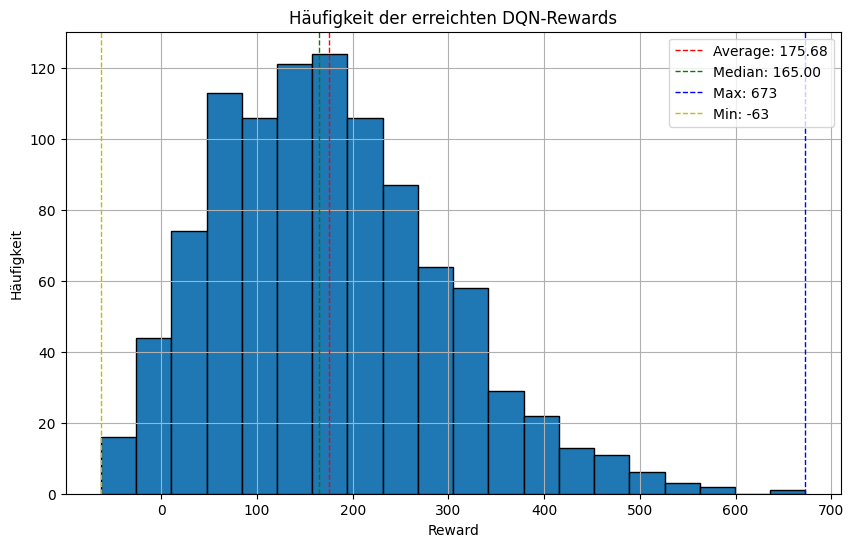

Average Reward: 175.68
Median Reward: 165.00
Max Reward: 673
Min Reward: -63


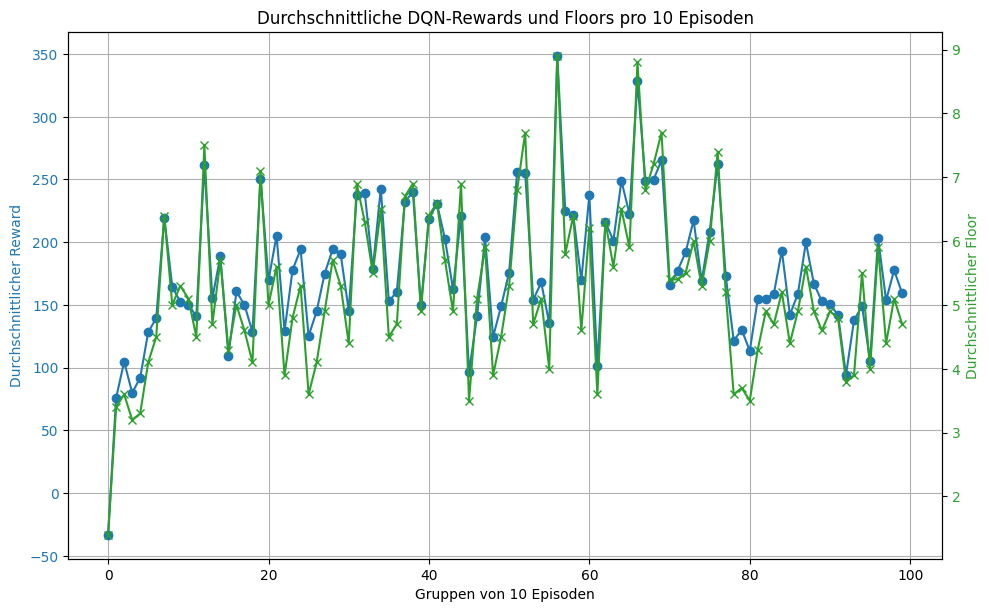

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Datei mit den DQN-Rewards einlesen
dqn_rewards = []
floors = []
with open("dqn_rewards_7.txt", "r") as reward_file:
    for line in reward_file:
        # Extrahiere den Reward und den Floor aus jeder Zeile
        parts = line.split(";")
        reward = int(parts[1].split("Reward = ")[1])
        floor = int(parts[2].split("Floor=")[1])
        dqn_rewards.append(reward)
        floors.append(floor)
#print(dqn_rewards)
# Berechne statistische Kennzahlen
average_reward = np.mean(dqn_rewards)
median_reward = np.median(dqn_rewards)
max_reward = np.max(dqn_rewards)
min_reward = np.min(dqn_rewards)

# Erstelle ein Histogramm der DQN-Rewards
plt.figure(figsize=(10, 6))
plt.hist(dqn_rewards, bins=20, edgecolor='black')
plt.title('Häufigkeit der erreichten DQN-Rewards')
plt.xlabel('Reward')
plt.ylabel('Häufigkeit')
plt.grid(True)

# Füge statistische Kennzahlen zum Diagramm hinzu
plt.axvline(average_reward, color='r', linestyle='dashed', linewidth=1, label=f'Average: {average_reward:.2f}')
plt.axvline(median_reward, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_reward:.2f}')
plt.axvline(max_reward, color='b', linestyle='dashed', linewidth=1, label=f'Max: {max_reward}')
plt.axvline(min_reward, color='y', linestyle='dashed', linewidth=1, label=f'Min: {min_reward}')
plt.legend()

plt.show()

# Ausgabe der statistischen Kennzahlen
print(f"Average Reward: {average_reward:.2f}")
print(f"Median Reward: {median_reward:.2f}")
print(f"Max Reward: {max_reward}")
print(f"Min Reward: {min_reward}")

# Berechne den durchschnittlichen Reward für Gruppen von 10 Episoden
group_size = 10
grouped_rewards = [np.mean(dqn_rewards[i:i + group_size]) for i in range(0, len(dqn_rewards), group_size)]
grouped_floors = [np.mean(floors[i:i + group_size]) for i in range(0, len(floors), group_size)]

# Erstelle ein Liniendiagramm der durchschnittlichen Rewards und Floors
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Gruppen von 10 Episoden')
ax1.set_ylabel('Durchschnittlicher Reward', color=color)
ax1.plot(grouped_rewards, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Durchschnittlicher Floor', color=color)  # we already handled the x-label with ax1
ax2.plot(grouped_floors, marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Durchschnittliche DQN-Rewards und Floors pro 10 Episoden')
plt.show()

Nach dem Experiment mit dem vorzeitigen beenden kann man hier zum ersten mal wirklich. Extrem gute ergebnisse vorzeigen, in der die aller meisten Episoden positive Ergebnisse bringen. Das liegt aber wohl unteranderem auch daran das alle vorher zu negativen Ergebnissen verleiteten KIs nun vorzeitig gestoppt werden und nur einen relative kleine negativen Reward von -20 in kauf nehmen müssen. Im Vergleich zu vorher wurden auch wieder hohe durchschnittliche Floors erreicht, leider wurde die Performance im Verlauf aber immer noch schlechter. Um dies zu Verbessern könnten zum einen der Wertverfall von Belohnungen Gamma angepasst werden, zum anderen könnte die Bestrafung für ein vorläufige Ende erhöht werden.

Im folgenden Werde ich einmal noch versuchen den Gamma Wert anzupassen, mich aber ansonsten von hier an auf andere KI Alogrithmen konzentrieren. 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque
from world import World

# Überprüfen, ob eine GPU verfügbar ist
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 1    # Angepasste zu gar kein gamma Zerfall
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = DQN(state_size, action_size).to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.MSELoss()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        act_values = self.model(state)
        return torch.argmax(act_values[0]).item()

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                next_state = torch.FloatTensor(next_state).unsqueeze(0).to(device)
                target = (reward + self.gamma * torch.max(self.model(next_state)[0]).item())
            state = torch.FloatTensor(state).unsqueeze(0).to(device)
            target_f = self.model(state)
            target_f[0][action] = target
            self.optimizer.zero_grad()
            loss = self.criterion(target_f, self.model(state))
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [8]:
import random
from world import World

# Hyperparameter
batch_size = 32
n_episodes = 1

# Initialisieren des 2 DQN-Agenten nun mit Variable für Situation und currently playing Card

#erstellene einer Testwelt
seed = random.randint(0, 1000000)
welt = World(seed=seed)
# holen der Beispielstates aus der Testwelt. Dadurch muss ich nach Anpassungen an der Weltklasse nicht die Werte anpassen
example_actionspace= welt.get_entire_action_space()
example_gamestate = welt.get_state_machinereadble()


state_size = len(example_gamestate)
action_size = len(example_actionspace)
print("State Size:",state_size)
print("Action Size:",action_size)
agent = DQNAgent(state_size, action_size)

# Datei zum Speichern der Rewards öffnen
with open("dqn_rewards_8.txt", "w") as reward_file:
    for e in range(n_episodes):
        # Generiere einen zufälligen Seed
        seed = random.randint(0, 1000000)
        startseed = seed
        
        # Erstelle eine neue Welt mit automatischem Spielen
        welt = World(seed=seed, autoplay=False,out_print=False)
        done = False
        
        # Initialisieren des Zustands
        state = np.array(welt.get_state_machinereadble())
        episode_reward = 0
        while True:
            # entire Actionspace holen
            actionspace = welt.get_entire_action_space()
            
            # Action auswählen
            action = agent.act(state)
            # Action ausführen
            #reward auf 0 setzen und dann gucken wie sich der reward durch die action verändert
            welt.reward = 0
            welt.take_action(actionspace[action])
            next_state = np.array(welt.get_state_machinereadble())
            reward = welt.get_reward()
            episode_reward += reward
            done = welt.situation == "Game Over"
            
            # Speichern der Erfahrung im Replay-Speicher
            agent.remember(state, action, reward, next_state, done)
            
            # Zustand aktualisieren
            state = next_state
            
            # Replay ausführen, wenn genügend Erfahrungen gesammelt wurden
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
            
            if done:
                break
        
        reward_file.write(f"Episode {e+1}: Seed={startseed}; Reward = {episode_reward}; Floor={welt.floor_number}\n")
        print(f"Episode {e+1}: Reward = {episode_reward}")

print("Alle Episoden abgeschlossen und Rewards gespeichert.")

State Size: 49
Action Size: 8
Episode 1: Reward = -69
Alle Episoden abgeschlossen und Rewards gespeichert.


In [9]:
import sys
import random
from world import World

# Umleiten der Standardausgabe
original_stdout = sys.stdout
with open("output_log_8.txt", "w") as log_file:
    sys.stdout = log_file

    # Playtesting des frisch trainierten Agent
    seed = 19332
    welt = World(seed=seed, autoplay=False, out_print=False)
    #welt.get_state_human()
    print("anfang12")
    episode_reward = 0
    while welt.situation != "Game Over":
        # Gamestate holen
        # gamestate = welt.get_state_human()
        # print(gamestate)
        # Actionspace holen
        all_actionspace = welt.get_action_space()
        # print("ActionSpace:",all_actionspace)
        # Action auswählen
        actionspace = welt.get_entire_action_space()

        # Action auswählen
        action = agent.act(state)
        # Action ausführen
        # Reward auf 0 setzen und dann gucken wie sich der Reward durch die Action verändert
        welt.reward = 0
        welt.take_action(actionspace[action])
        reward = welt.get_reward()
        episode_reward += reward    
        print("Bisherige Rewards: ", episode_reward)
        print("Momentaner Rewards: ", reward)
        print("Aktion: ", actionspace[action])
    print("Reward gesammelt:", episode_reward)

    # Wiederherstellen der Standardausgabe
    sys.stdout = original_stdout

print("Playtesting abgeschlossen und Ausgaben gespeichert.")

Playtesting abgeschlossen und Ausgaben gespeichert.


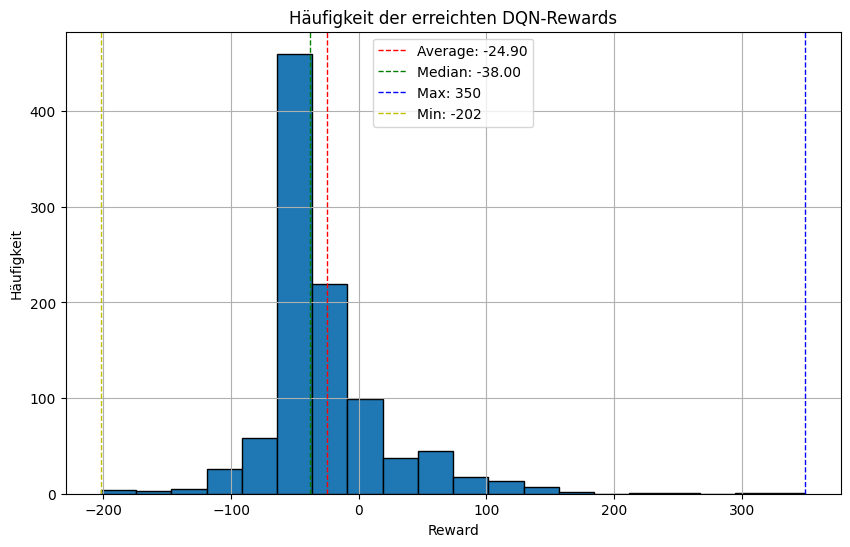

Average Reward: -24.90
Median Reward: -38.00
Max Reward: 350
Min Reward: -202


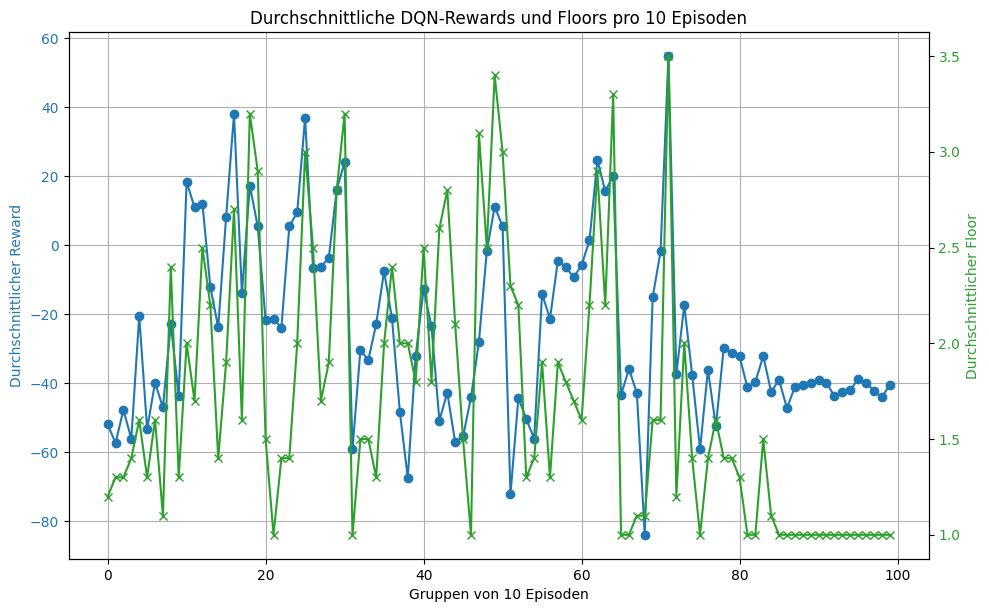

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Datei mit den DQN-Rewards einlesen
dqn_rewards = []
floors = []
with open("dqn_rewards_8.txt", "r") as reward_file:
    for line in reward_file:
        # Extrahiere den Reward und den Floor aus jeder Zeile
        parts = line.split(";")
        reward = int(parts[1].split("Reward = ")[1])
        floor = int(parts[2].split("Floor=")[1])
        dqn_rewards.append(reward)
        floors.append(floor)
#print(dqn_rewards)
# Berechne statistische Kennzahlen
average_reward = np.mean(dqn_rewards)
median_reward = np.median(dqn_rewards)
max_reward = np.max(dqn_rewards)
min_reward = np.min(dqn_rewards)

# Erstelle ein Histogramm der DQN-Rewards
plt.figure(figsize=(10, 6))
plt.hist(dqn_rewards, bins=20, edgecolor='black')
plt.title('Häufigkeit der erreichten DQN-Rewards')
plt.xlabel('Reward')
plt.ylabel('Häufigkeit')
plt.grid(True)

# Füge statistische Kennzahlen zum Diagramm hinzu
plt.axvline(average_reward, color='r', linestyle='dashed', linewidth=1, label=f'Average: {average_reward:.2f}')
plt.axvline(median_reward, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_reward:.2f}')
plt.axvline(max_reward, color='b', linestyle='dashed', linewidth=1, label=f'Max: {max_reward}')
plt.axvline(min_reward, color='y', linestyle='dashed', linewidth=1, label=f'Min: {min_reward}')
plt.legend()

plt.show()

# Ausgabe der statistischen Kennzahlen
print(f"Average Reward: {average_reward:.2f}")
print(f"Median Reward: {median_reward:.2f}")
print(f"Max Reward: {max_reward}")
print(f"Min Reward: {min_reward}")

# Berechne den durchschnittlichen Reward für Gruppen von 10 Episoden
group_size = 10
grouped_rewards = [np.mean(dqn_rewards[i:i + group_size]) for i in range(0, len(dqn_rewards), group_size)]
grouped_floors = [np.mean(floors[i:i + group_size]) for i in range(0, len(floors), group_size)]

# Erstelle ein Liniendiagramm der durchschnittlichen Rewards und Floors
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Gruppen von 10 Episoden')
ax1.set_ylabel('Durchschnittlicher Reward', color=color)
ax1.plot(grouped_rewards, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Durchschnittlicher Floor', color=color)  # we already handled the x-label with ax1
ax2.plot(grouped_floors, marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Durchschnittliche DQN-Rewards und Floors pro 10 Episoden')
plt.show()

In [6]:
class Actor(nn.Module):
    def __init__(self, state_size, action_size):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=-1)
        return x

class Critic(nn.Module):
    def __init__(self, state_size):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class ActorCriticAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.actor = Actor(state_size, action_size).to(device)
        self.critic = Critic(state_size).to(device)
        self.optimizer_actor = optim.Adam(self.actor.parameters(), lr=0.001)
        self.optimizer_critic = optim.Adam(self.critic.parameters(), lr=0.001)
        self.gamma = 0.95

    def act(self, state):
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        probs = self.actor(state)
        action = np.random.choice(self.action_size, p=probs.cpu().detach().numpy()[0])
        return action, probs[0, action]

    def learn(self, state, action_prob, reward, next_state, done):
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        next_state = torch.FloatTensor(next_state).unsqueeze(0).to(device)
        reward = torch.tensor(reward).to(device)
        done = torch.tensor(done, dtype=torch.float32).to(device)

        # Compute the value of the current state and the next state
        value = self.critic(state)
        next_value = self.critic(next_state)

        # Compute the target value
        target = reward + (1 - done) * self.gamma * next_value
        delta = target - value

        # Update the critic
        critic_loss = delta.pow(2).mean()
        self.optimizer_critic.zero_grad()
        critic_loss.backward()
        self.optimizer_critic.step()

        # Update the actor
        actor_loss = -torch.log(action_prob) * delta.detach()
        self.optimizer_actor.zero_grad()
        actor_loss.backward()
        self.optimizer_actor.step()

In [7]:
import random
from world import World


# Hyperparameter
batch_size = 32
n_episodes = 1

# Initialisieren des Actor-Critic-Agenten
#erstellene einer Testwelt
seed = random.randint(0, 1000000)
welt = World(seed=seed)
# holen der Beispielstates aus der Testwelt. Dadurch muss ich nach Anpassungen an der Weltklasse nicht die Werte anpassen
example_actionspace= welt.get_entire_action_space()
example_gamestate = welt.get_state_machinereadble()
state_size = len(example_gamestate)
action_size = len(example_actionspace)
print("State Size:",state_size)
print("Action Size:",action_size)
agent = ActorCriticAgent(state_size, action_size)

# Datei zum Speichern der Rewards öffnen
with open("actor_critic_rewards.txt", "w") as reward_file:
    for e in range(n_episodes):
        # Generiere einen zufälligen Seed
        seed = random.randint(0, 1000000)
        startseed = seed
        
        # Erstelle eine neue Welt mit automatischem Spielen
        welt = World(seed=seed, autoplay=False)
        done = False
        
        # Initialisieren des Zustands
        state = np.array(welt.get_state_machinereadble())
        episode_reward = 0
        
        while not done:
            # entire Actionspace holen
            actionspace = welt.get_entire_action_space()
            
            # Action auswählen
            action, action_prob = agent.act(state)
            
            # Action ausführen
            welt.reward = 0
            welt.take_action(actionspace[action])
            next_state = np.array(welt.get_state_machinereadble())
            reward = welt.get_reward()
            episode_reward += reward
            done = welt.situation == "Game Over"
            
            # Lernen
            agent.learn(state, action_prob, reward, next_state, done)
            
            # Zustand aktualisieren
            state = next_state
            
            if done:
                break
        
        reward_file.write(f"Episode {e+1}: Seed={startseed}; Reward = {episode_reward}; Floor={welt.floor_number}\n")
        print(f"Episode {e+1}: Reward = {episode_reward}")

print("Alle Episoden abgeschlossen und Rewards gespeichert.")

State Size: 49
Action Size: 8
Episode 1: Reward = -1073
Alle Episoden abgeschlossen und Rewards gespeichert.


In [ ]:
import sys
import random
from world import World

# Umleiten der Standardausgabe
original_stdout = sys.stdout
with open("output_log_actor_critic.txt", "w") as log_file:
    sys.stdout = log_file

    # Playtesting des frisch trainierten Agent
    seed = 19332
    welt = World(seed=seed, autoplay=False, out_print=False)
    #welt.get_state_human()
    print("anfang12")
    episode_reward = 0
    while welt.situation != "Game Over":
        # Gamestate holen
        # gamestate = welt.get_state_human()
        # print(gamestate)
        # Actionspace holen
        all_actionspace = welt.get_action_space()
        # print("ActionSpace:",all_actionspace)
        # Action auswählen
        actionspace = welt.get_entire_action_space()

        # Action auswählen
        action = agent.act(state)
        # Action ausführen
        # Reward auf 0 setzen und dann gucken wie sich der Reward durch die Action verändert
        welt.reward = 0
        welt.take_action(actionspace[action])
        reward = welt.get_reward()
        episode_reward += reward    
        print("Bisherige Rewards: ", episode_reward)
        print("Momentaner Rewards: ", reward)
        print("Aktion: ", actionspace[action])
    print("Reward gesammelt:", episode_reward)

    # Wiederherstellen der Standardausgabe
    sys.stdout = original_stdout

print("Playtesting abgeschlossen und Ausgaben gespeichert.")

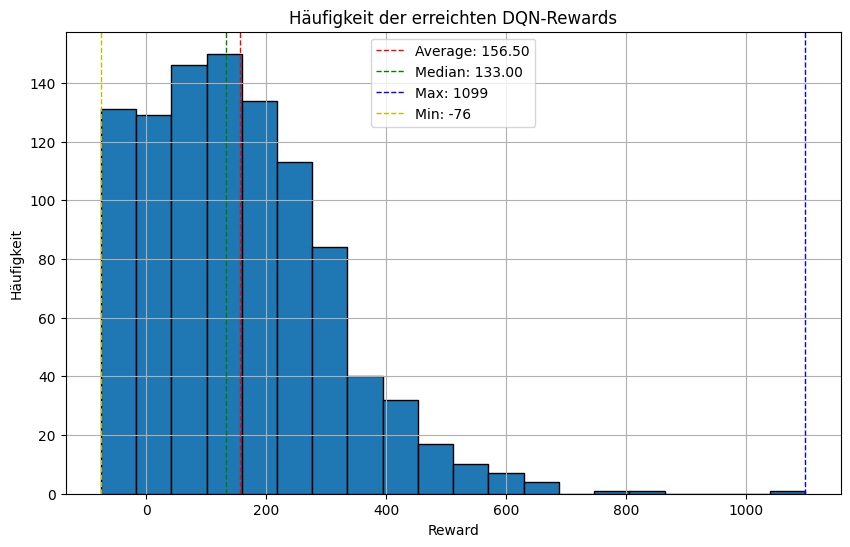

Average Reward: 156.50
Median Reward: 133.00
Max Reward: 1099
Min Reward: -76


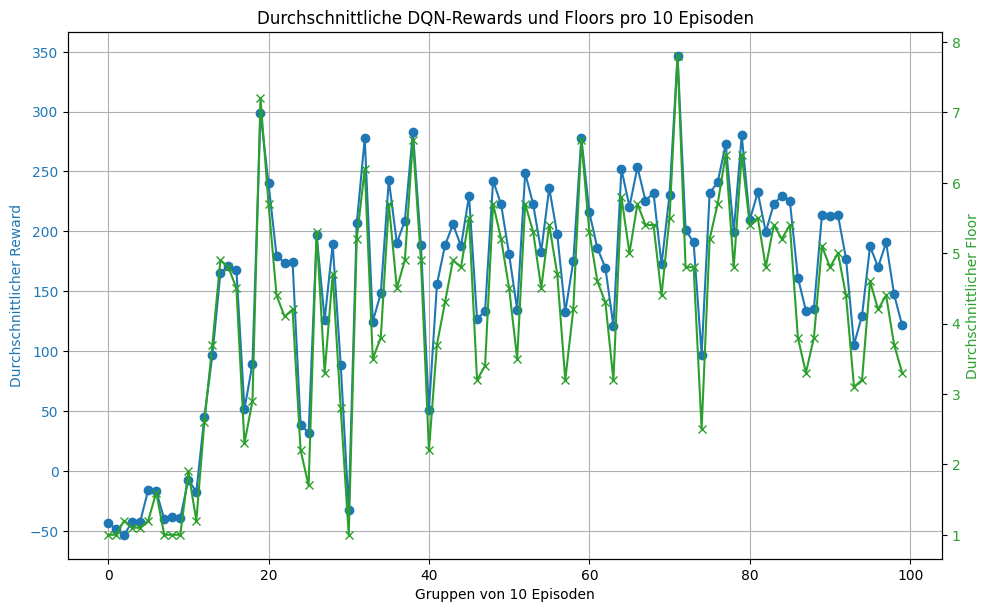

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Datei mit den DQN-Rewards einlesen
dqn_rewards = []
floors = []
with open("actor_critic_rewards.txt", "r") as reward_file:
    for line in reward_file:
        # Extrahiere den Reward und den Floor aus jeder Zeile
        parts = line.split(";")
        reward = int(parts[1].split("Reward = ")[1])
        floor = int(parts[2].split("Floor=")[1])
        dqn_rewards.append(reward)
        floors.append(floor)
#print(dqn_rewards)
# Berechne statistische Kennzahlen
average_reward = np.mean(dqn_rewards)
median_reward = np.median(dqn_rewards)
max_reward = np.max(dqn_rewards)
min_reward = np.min(dqn_rewards)

# Erstelle ein Histogramm der DQN-Rewards
plt.figure(figsize=(10, 6))
plt.hist(dqn_rewards, bins=20, edgecolor='black')
plt.title('Häufigkeit der erreichten DQN-Rewards')
plt.xlabel('Reward')
plt.ylabel('Häufigkeit')
plt.grid(True)

# Füge statistische Kennzahlen zum Diagramm hinzu
plt.axvline(average_reward, color='r', linestyle='dashed', linewidth=1, label=f'Average: {average_reward:.2f}')
plt.axvline(median_reward, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_reward:.2f}')
plt.axvline(max_reward, color='b', linestyle='dashed', linewidth=1, label=f'Max: {max_reward}')
plt.axvline(min_reward, color='y', linestyle='dashed', linewidth=1, label=f'Min: {min_reward}')
plt.legend()

plt.show()

# Ausgabe der statistischen Kennzahlen
print(f"Average Reward: {average_reward:.2f}")
print(f"Median Reward: {median_reward:.2f}")
print(f"Max Reward: {max_reward}")
print(f"Min Reward: {min_reward}")

# Berechne den durchschnittlichen Reward für Gruppen von 10 Episoden
group_size = 10
grouped_rewards = [np.mean(dqn_rewards[i:i + group_size]) for i in range(0, len(dqn_rewards), group_size)]
grouped_floors = [np.mean(floors[i:i + group_size]) for i in range(0, len(floors), group_size)]

# Erstelle ein Liniendiagramm der durchschnittlichen Rewards und Floors
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Gruppen von 10 Episoden')
ax1.set_ylabel('Durchschnittlicher Reward', color=color)
ax1.plot(grouped_rewards, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Durchschnittlicher Floor', color=color)  # we already handled the x-label with ax1
ax2.plot(grouped_floors, marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Durchschnittliche DQN-Rewards und Floors pro 10 Episoden')
plt.show()

Im Vergleich zu dqn_reward_7 erscheint das Actor_Critic KI Modell grundsätzlich besser abzuschneiden. Es schafft es höhere Rewards zu sammeln und auch höhere Floors zu erreichen. Aber genauso wie auch bei dem Vergleichsmodell ist keine stetige Verbesserung zu erkennen. Das Modell hat an vielen Stellen immer noch Problem überhaupt kämpfe zu schaffen. Im Verlaufe des Trainings ist auch hier wieder eine tendenz zur Verschlechterung zu erkennen. Sich die Ausgaben der KI anzugucken hat leider nach dem Training dieser KI nicht funktioniert da sich das Juypter Notebook als ganze aufgehangen hat und einen Neustart brauchte. Insofern müsste noch einmal neu trainiert werden, worauf ich aus Zeitgründen verzichten muss.

In [21]:
import numpy as np
import random
from collections import defaultdict, deque
from world import World
import torch
import torch.nn as nn
import torch.optim as optim

class QLearningAgent:
    def __init__(self, state_size, action_size, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.state_size = state_size
        self.action_size = action_size
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = defaultdict(lambda: np.zeros(action_size))

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_size)
        else:
            return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state, done):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action] * (1 - done)
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error


class DynaQAgent(QLearningAgent):
    def __init__(self, state_size, action_size, alpha=0.1, gamma=0.99, epsilon=0.1, planning_steps=5):
        super().__init__(state_size, action_size, alpha, gamma, epsilon)
        self.model = defaultdict(lambda: [])
        self.planning_steps = planning_steps

    def learn(self, state, action, reward, next_state, done):
        super().learn(state, action, reward, next_state, done)
        self.model[state].append((action, reward, next_state, done))
        self.planning()

    def planning(self):
        for _ in range(self.planning_steps):
            state = random.choice(list(self.model.keys()))
            action, reward, next_state, done = random.choice(self.model[state])
            super().learn(state, action, reward, next_state, done)

In [24]:
n_episodes=10
planning_steps=5
welt=World(seed=random.randint(0, 1000000))
state_size = len(welt.get_state_machinereadble())
action_size = len(welt.get_entire_action_space())
agent = DynaQAgent(state_size, action_size, planning_steps=planning_steps)
log_file = "dyna_q_rewards.txt"

for e in range(n_episodes):
    env = World(seed=random.randint(0, 1000000), autoplay=False)
    state = tuple(np.array(env.get_state_machinereadble()))
    done = False
    episode_reward = 0

    while not done:
        action = agent.act(state)
        env.reward = 0
        env.take_action(env.get_entire_action_space()[action])
        next_state = tuple(np.array(env.get_state_machinereadble()))
        reward = env.get_reward()
        done = env.situation == "Game Over"

        agent.learn(state, action, reward, next_state, done)
        state = next_state
        episode_reward += reward

    with open(log_file, "a") as f:
        f.write(f"Episode {e+1}, Reward: {episode_reward}\n")
    print(f"Episode {e+1}, Reward: {episode_reward}")


Episode 1, Reward: -39
Episode 2, Reward: -38
Episode 3, Reward: -37
Episode 4, Reward: -30
Episode 5, Reward: -22
Episode 6, Reward: -40
Episode 7, Reward: -22
Episode 8, Reward: -67
Episode 9, Reward: -39
Episode 10, Reward: -21
